<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/185150407111023_Christian_Doxa_Hamasiah_Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tujuan Bisnis
Tujuan bisnis dari model yang dibuat adalah untuk mendeteksi sms yang diterima merupakan spam atau tidak yang nantinya bisa diintegrasikan menjadi sebuah middleware dalam sebuah aplikasi smartphone.

# Analisa Pendekatan
Pendekatan yang akan dilakukan adalah dengan mencari dataset sms yang memiliki label spam dan tidak. Kemudian akan diproses menggunakan natural language processing dan menggunakan neural network atau deep learning.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

# Pengumpulan Data
Data dikumpulkan atau dapat diambil dari personal atau instansi yang menyediakan dataset yang sesuai apabila masih belum memiliki cukup data untuk dilakukan analisa. Pada kasus ini kita menggunakan dataset yang disediakan oleh Rahmi, F. and Wibisono, Y.  (2016) dengan lisensi:
Lisensi: https://creativecommons.org/licenses/by-sa/4.0/
versi: 1.0 (Agt 2018)

In [ ]:
!wget -nc -O spam.csv "https://drive.google.com/uc?export=download&id=1cD85v6MvIP17MKexW7h5YBEenqEoGkqp"

--2020-12-05 10:32:53--  https://drive.google.com/uc?export=download&id=1cD85v6MvIP17MKexW7h5YBEenqEoGkqp
Resolving drive.google.com (drive.google.com)... 172.217.164.142, 2607:f8b0:4004:814::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.142|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q3mvguqmlqjjk9s86pod4f18a5j8mo7v/1607164350000/04116330833260735955/*/1cD85v6MvIP17MKexW7h5YBEenqEoGkqp?e=download [following]
--2020-12-05 10:32:53--  https://doc-0c-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q3mvguqmlqjjk9s86pod4f18a5j8mo7v/1607164350000/04116330833260735955/*/1cD85v6MvIP17MKexW7h5YBEenqEoGkqp?e=download
Resolving doc-0c-20-docs.googleusercontent.com (doc-0c-20-docs.googleusercontent.com)... 172.217.15.97, 2607:f8b0:4004:811::2001
Connecting to doc-0c-20-docs.googleusercontent.com (doc-0c-20-docs

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1', quotechar='"')

# Pemahaman terhadap data
Data memiliki dua kolom yang pertama adalah konten sms yang kedua adalah label untuk sms tersebut secara berurut indeks pertama atau nol adalah sms normal, indeks kedu atau satu adalah sms penipuan, dan yang terakhir yang ketiga atau dua adalah sms promosi. Dua kolom atau fitur terakhir tersebut yang merupakan spam.

In [ ]:
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


# Persiapan data
Dilakukan renaming pada kolom teks menjadi data agar terminologinya menjadi jelas, kemudian kita lakukan mapping untuk indeks kedua dan ketiga menjadi bernilai satu karena kita akan melakukan binary classification sehingga kita jadikan satu antara sms penipuan dan sms promosi menjadi sms spam. Sedangkan untuk indeks pertama atau sms normal kita mapping kembali ke nilai nol atau bernilai bukan spam.

In [ ]:
# mengganti nama kolom agar menjadi jelas
df.columns = ['data', 'labels']

In [ ]:
df.head()

,data,labels
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
# membuat label binary sms penipuan dengan indeks 1 atau promosi dengan
# dengan indeks 2 diberi label 1 karena merupakan spam
df['b_labels'] = df['labels'].map({0:0, 1:1, 2:1})
Y = df['b_labels'].values

In [ ]:
df.tail()

,data,labels,b_labels
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,0
1139,ð sebelumnya ga ad nulis kerudung. Kirain w...,0,0
1140,Mba mau kirim 300 ya,0,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,0
1142,No bri atas nama kamu mana,0,0


In [ ]:
# membagi data menjadi data training dan testing dengan rasio 67% training dan 33% testing.
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [ ]:
# mengubah kalimat menjadi urutan kata
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
# melihat jumlah token unique / kata yang unik
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 3907 unique tokens.


In [ ]:
# menggunakan pad sequences agar kita memiliki matriks N x T
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# melihat panjang urutan
T = data_train.shape[1]

Shape of data train tensor: (765, 71)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (378, 71)


# Pemodelan Data
Pemodelan dilakukan dengan menggunakan natural language processing menggunakan algoritma Recurrent Neural Network (RNN) atau jaringan neural yang bisa mengingat hasil sebelumnya dari setiap layernya. Dengan menggunakan Long Short Term Memory (LSTM) dan fungsi aktivasinya adalah sigmoid karena kita melakukan binary classification sehingga model dapat menghasilkan probabilitas antara 0 sampai 1 untuk spam atau tidak dengan 0 sebagai tidak spam dan 1 sebagai spam.

In [ ]:
# membuat model

# Menentukan embedding dimensionality
D = 20

# Menentukan Hidden state dimensionality
M = 15

# Note: kita membuat ukuran embedding dimensionalitynya menjadi (V + 1) x D,
# karena indeks pertama dimulai dari 1 dan tidak dari 0.
# Sehingga indeks terakir dari matriks embedding adalah V,
# Sehingga kita harus membuat ukuran V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [ ]:
# Compile dan fit model dengan dataset
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
24/24 [==============================] - 1s 22ms/step - loss: 0.6910 - accuracy: 0.6980 - val_loss: 0.6853 - val_accuracy: 0.8704
Epoch 2/10
24/24 [==============================] - 0s 9ms/step - loss: 0.6777 - accuracy: 0.9190 - val_loss: 0.6690 - val_accuracy: 0.9550
Epoch 3/10
24/24 [==============================] - 0s 9ms/step - loss: 0.6441 - accuracy: 0.9804 - val_loss: 0.6147 - val_accuracy: 0.9444
Epoch 4/10
24/24 [==============================] - 0s 8ms/step - loss: 0.5021 - accuracy: 0.9778 - val_loss: 0.4066 - val_accuracy: 0.9074
Epoch 5/10
24/24 [==============================] - 0s 16ms/step - loss: 0.3841 - accuracy: 0.9176 - val_loss: 0.3505 - val_accuracy: 0.9577
Epoch 6/10
24/24 [==============================] - 0s 9ms/step - loss: 0.2664 - accuracy: 0.9882 - val_loss: 0.2923 - val_accuracy: 0.9630
Epoch 7/10
24/24 [==============================] - 0s 8ms/step - loss: 0.2005 - accuracy: 0.9908 - val_loss: 0.2452 - val_accuracy: 0.9603


# Evaluasi Model
Evaluasi dilakukan dengan cara melakukan plotting loss dan accuracy dari dataset training dan testing, dapat terlihat untuk loss per iterationnya untuk daata testingnya adalah sekitar 8% sedangkan untuk testingnya sekitar 17%, untuk akurasi data training adalah 99% kemudian untuk akurasi data testingnya adalah 96%, sehinggan model memiliki akurasi **96%** untuk data baru. Kemudian ketika dilakukan testing terhadap data sms yang sangat baru dengan tulisan "Dapatkan saldo bermain sebesar Rp 100rb hanya dengan bayar Rp 75rb", model menghasilkan nilai kepercayaan diri sebesar 94,9% bahwa sms tersebut merupakan spam.

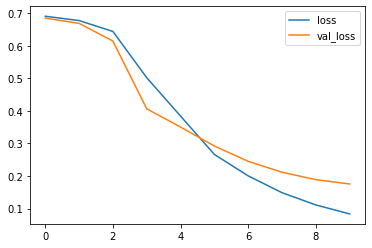

In [ ]:
# Plotting loss per iterasi
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

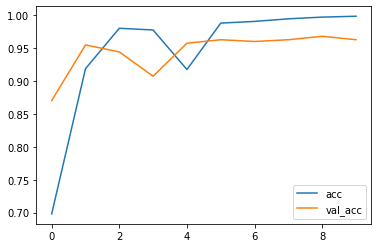

In [ ]:
# Plotting akurasi per iterasi
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# testing model dengan data sms spam yang baru masuk
sms_baru = ['Dapatkan saldo bermain sebesar Rp 100rb hanya dengan bayar Rp 75rb']
testing = tokenizer.texts_to_sequences(sms_baru)
data_testing = pad_sequences(testing, maxlen=T)
pred = model.predict(data_testing)
print("Hasil prediksi {}".format(pred))

Hasil prediksi [[0.9488037]]
